In [50]:
# Part1 Q1

# expand the squares in terms of theta
import sympy as sp

# Define symbols
theta, phi, tau, theta_0, n = sp.symbols('theta phi tau theta_0 n')
x_i = sp.symbols('x_i', real=True)

# Define the expression
expression = sp.exp(-1/2 * (tau + n*phi) * (theta - 1/(tau + n*phi) * (tau*theta_0 + phi*sp.Sum(x_i, (x_i, 1, n))) )**2)

# Expand and simplify
expanded_expression = sp.simplify(sp.expand(expression))
expanded_expression

exp(-0.5*n*phi**3*(n**2/2 + n/2)**2/(n**2*phi**2 + 2*n*phi*tau + tau**2) - 1.0*n*phi**2*tau*theta_0*(n**2/2 + n/2)/(n**2*phi**2 + 2*n*phi*tau + tau**2) - 0.5*n*phi*tau**2*theta_0**2/(n**2*phi**2 + 2*n*phi*tau + tau**2) + 1.0*n*phi*tau*theta*theta_0/(n*phi + tau) - 0.5*n*phi*theta**2 - 0.5*phi**2*tau*(n**2/2 + n/2)**2/(n**2*phi**2 + 2*n*phi*tau + tau**2) - 1.0*phi*tau**2*theta_0*(n**2/2 + n/2)/(n**2*phi**2 + 2*n*phi*tau + tau**2) + 1.0*phi*theta*(n**2/2 + n/2) - 0.5*tau**3*theta_0**2/(n**2*phi**2 + 2*n*phi*tau + tau**2) + 1.0*tau**2*theta*theta_0/(n*phi + tau) - 0.5*tau*theta**2)

In [52]:
# Part1 Q2

# rebuild the quadratic in terms of theta
import sympy as sp

# Define symbols
theta, phi, tau, theta_0, n = sp.symbols('theta phi tau theta_0 n')
x_i = sp.symbols('x_i', real=True)

# Define the original expression
original_expression = sp.exp(-1/2 * (tau + n*phi) * (theta - 1/(tau + n*phi) * (tau*theta_0 + phi*sp.Sum(x_i, (x_i, 1, n))) )**2)

# Extract the quadratic term
quadratic_term = sp.collect(original_expression, theta, evaluate=False).get(theta**2, 0)

# Expand and simplify the quadratic term
expanded_quadratic = sp.expand(quadratic_term)
simplified_quadratic = sp.simplify(expanded_quadratic)

# Rebuild the quadratic in terms of theta
a = 1 / (tau + n*phi)
b = (tau*theta_0 + phi*sp.summation(x_i, (x_i, 1, n))) / (tau + n*phi)
rebuild_quadratic = a * (theta - b)**2

rebuild_quadratic

(theta - (phi*(n**2/2 + n/2) + tau*theta_0)/(n*phi + tau))**2/(n*phi + tau)

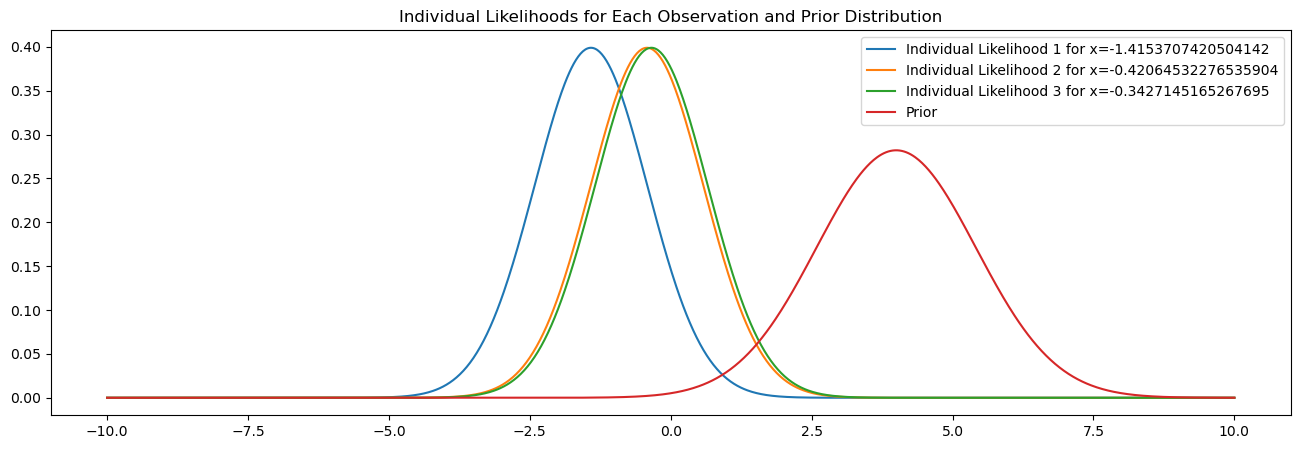

In [53]:
# Part2 Q1

# Make the “Classic Bayes” figure, but instead of a single likelihood, plot the individual likelihoods of each observation.
# Hint: Consider the code "for xi in range(x): print(xi)"
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate random samples
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Initialize an array for individual likelihoods
likelihoods = np.zeros((n, len(parameter_domain)))

# Calculate and plot the prior distribution and the individual likelihoods
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
plt.figure(figsize=(16, 5))
for i in range(n):
    individual_likelihood = stats.norm.pdf(x[i], loc=parameter_domain, scale=1)
    plt.plot(parameter_domain, individual_likelihood, label=f"Individual Likelihood {i+1} for x={x[i]}")
plt.plot(parameter_domain, prior, label="Prior")

# Add legend and title
plt.legend()
plt.title("Individual Likelihoods for Each Observation and Prior Distribution")
plt.show()


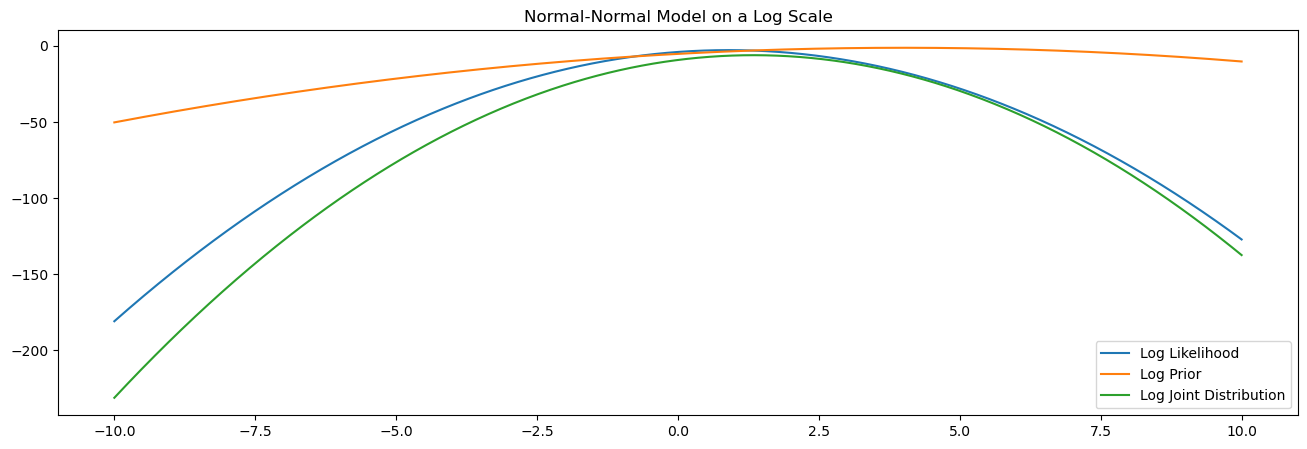

In [74]:
# Part2 Q2

# Make the “Classic Bayes” figure for the normal-normal model on a log scale. 
# Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using stats.norm.logpdf(）
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate random samples
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Calculate log likelihood, log prior, and log joint distribution
log_likelihood = np.sum(stats.norm.logpdf(x[:, np.newaxis], loc=parameter_domain, scale=1), axis=0)
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)
log_joint = log_likelihood + log_prior

# Plot without log scale for y-axis
plt.figure(figsize=(16, 5))

plt.plot(parameter_domain, log_likelihood, label="Log Likelihood")
plt.plot(parameter_domain, log_prior, label="Log Prior")
plt.plot(parameter_domain, log_joint, label="Log Joint Distribution")

plt.legend()
plt.title("Normal-Normal Model on a Log Scale")
plt.show()

Posterior Mean: 0.35647302973198675
Posterior Standard Deviation: 0.1825741858350553


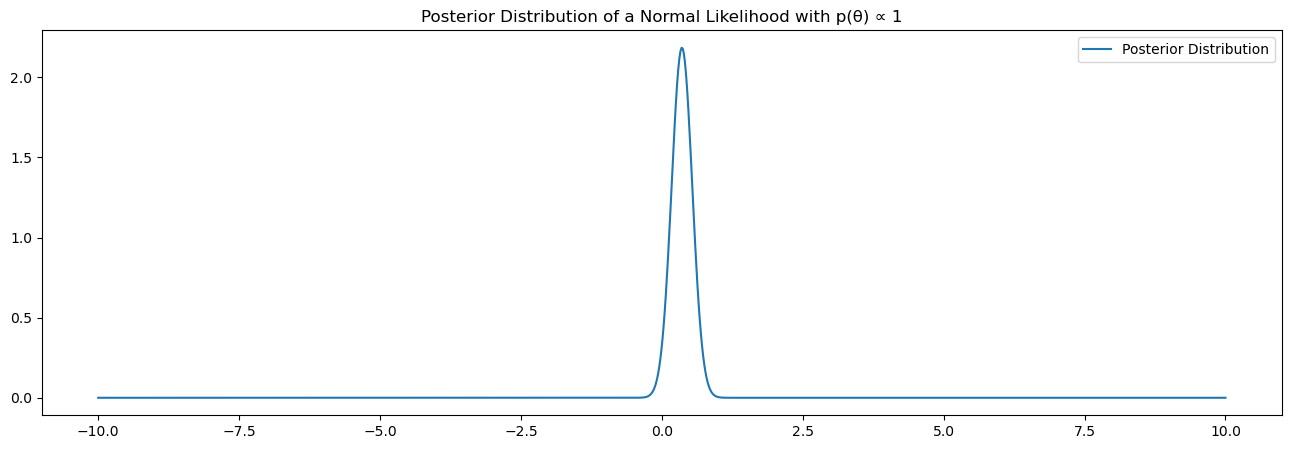

In [84]:
# Part2 Q3

# What is the posterior distribution of a normal likelihood with p(θ) ∝ 1?
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Generate random samples
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)

# Parameter domain
parameter_domain = np.linspace(-10, 10, 1000)

# Likelihood
likelihood = stats.norm.pdf((x[:, np.newaxis])*np.ones(parameter_domain.shape),
                            loc=parameter_domain, scale=1).prod(axis=0)

# Constants
c2 = 10

# Posterior distribution with p(θ) ∝ 1
posterior = likelihood**c2

# Normalize the posterior to make it a proper probability distribution
posterior /= np.trapz(posterior, parameter_domain)

# Calculate posterior mean and standard deviation
posterior_mean = np.trapz(parameter_domain * posterior, parameter_domain)
posterior_std = np.sqrt(np.trapz((parameter_domain - posterior_mean)**2 * posterior, parameter_domain))

print(f"Posterior Mean: {posterior_mean}")
print(f"Posterior Standard Deviation: {posterior_std}")

# Plotting
plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, posterior, label="Posterior Distribution")

plt.legend()
plt.title("Posterior Distribution of a Normal Likelihood with p(θ) ∝ 1")
plt.show()

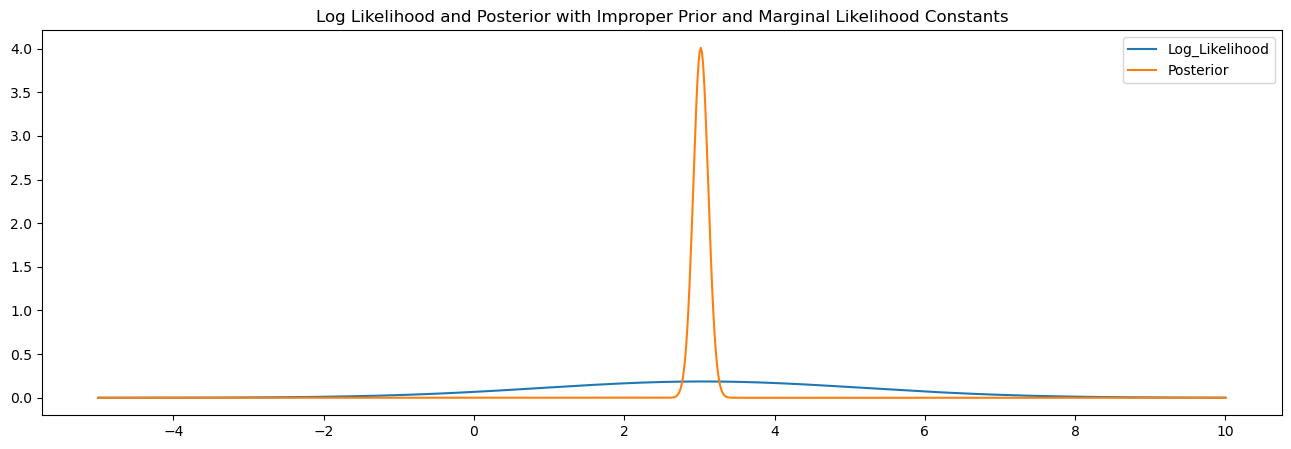

In [91]:
# Part2 Q4

# How do log likelihoods and posteriors differ from each other as a result of improper priors and marginal likelihood constants?
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

n = 3
data = stats.norm(loc=3, scale=2).rvs(100)

# Improper priors
prior_mean, prior_std = 0, 1

# Marginal likelihood constants
marginal_likelihood_constants = 1

# Log Likelihood parameters
log_likelihood_mean = np.mean(data)
log_likelihood_std = np.std(data, ddof=1)

# Posterior parameters
posterior_mean = (len(data) * log_likelihood_mean + marginal_likelihood_constants * prior_mean / prior_std**2) / (len(data) + marginal_likelihood_constants / prior_std**2)
posterior_std = 1 / np.sqrt(len(data) + marginal_likelihood_constants / prior_std**2)

# Create distributions
log_likelihood, posterior = stats.norm(loc=log_likelihood_mean, scale=log_likelihood_std), stats.norm(loc=posterior_mean, scale=posterior_std)

# Plot distributions
x_values = np.linspace(-5, 10, 1000)

plt.figure(figsize=(16, 5))
plt.plot(x_values, log_likelihood.pdf(x_values), label="Log_Likelihood")
plt.plot(x_values, posterior.pdf(x_values), label="Posterior")

plt.legend()
plt.title("Log Likelihood and Posterior with Improper Prior and Marginal Likelihood Constants")
plt.show()

Log likelihoods and posteriors differ when improper priors and marginal likelihood constants are introduced. The log likelihood represents the logarithm of the probability of observing the data given a specific parameter, while the posterior is the updated probability distribution of the parameter after considering both the likelihood and prior information. Improper priors and marginal likelihood constants impact the posterior by influencing its mean and standard deviation, leading to a shift in the distribution. These adjustments reflect the combined effect of prior beliefs, observed data, and the constant factor that scales the prior's impact on the posterior.